# <center>Projet mathématique - Partie I

## <center>Introduction aux chaînes de Markov, simulation et estimation par Monte Carlo

### Question 1

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

In [2]:
def sim_dis(p, x, M):
    y = []
    for i in range(M):
        j = 0
        S = p[0]
        u = np.random.uniform(0, 1)
        while u > S:
            j += 1
            S += p[j]
        y.append(x[j])
    return y

### Question 2

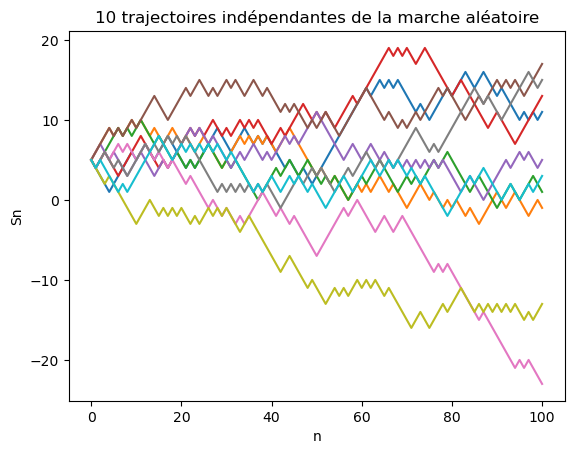

In [3]:
MA = []
for i in range(1000):
    L = sim_dis([0.5, 0.5], [-1, 1], 100)
    S = 5
    NA = [5]
    for j in range(0, 100):
        S += L[j]
        NA.append(S)
    MA.append(NA)

plt.figure()
for i in range(10):
    plt.plot(MA[i])
plt.title('10 trajectoires indépendantes de la marche aléatoire')
plt.xlabel('n')
plt.ylabel('Sn')
plt.show()

### Question 3

► Pour estimer la probabilité $\mathbb{P}\left( S_N \ge 5 \right)$, on peut simplement compter le nombre de trajectoires dans lesquelles la position finale $S_N$ est supérieure ou égale à 5, et diviser par le nombre total de trajectoires (ici, M = 1000).

In [4]:
# Estimation de la probabilité P(SN ≥ 5)
count3 = 0
for i in range(1000):
    if MA[i][-1] >= 5:
        count3 += 1
prob3 = count3/1000
print("Estimation de la probabilité P(SN ≥ 5) =", prob3)

Estimation de la probabilité P(SN ≥ 5) = 0.531


► Pour calculer l'intervalle de confiance à 95%, on peut utiliser la formule suivante :
$$ \boxed{ I = \left[\hat p_5-q_{0.975} \times \sqrt{\frac{\hat p_5(1-\hat p_5)}{M}}, \  \hat p_5+q_{0.975} \times \sqrt{\frac{\hat p_5(1-\hat p_5)}{M}}\right]}$$

avec $q_\alpha$ quantile d'ordre $\alpha$ de la loi normale centrée réduite et donc $q_{0.975} = 1.96$ d'après la table de la loi normale centrée réduite,     
$ M = 1000$ et $\hat p_5$  la probabilité estimée de la question précédente

Démonstration : 

On pose $Y_1, ..., Y_M$ un M échantillon iid tel que $\forall i (Y_i = 1) = (S_N \geq  5)$ et $ (Y_i = 0) = (S_N <  5)$.
On remarque que chaque $Y_i$ suit une loi de Bernoulli de paramètre $\boxed {p_5 = \mathbb{P}\left( S_N \ge 5 \right)}$.  

On pose $\overline{Y_M}$ la moyenne empirique de l'échantillon. Puisque $E[\overline{Y_M}] = E[Y_1] = p$ on peut prendre comme estimateur de $p_5$, $\hat p_5 = \overline{Y_M}$

D'après le théorème central limite on a par approximation pour M grand : $$ Z = \sqrt{M} \frac {\overline{Y_M} - E[Y_1]} {\sqrt{V[Y_1]}} \sim N(0,1) $$

Puis, on note $\phi$ la fonction de répartition de $N(0,1)$ alors on a : $$ P\left(q_{\frac{\alpha}{2}} \leq Z \leq q_{1-\frac{\alpha}{2}}\right) = \phi \left(q_{1-\frac{\alpha}{2}}\right) - \phi \left(q_{\frac{\alpha}{2}}\right) = 1 - \frac{\alpha}{2} - \frac{\alpha}{2} = 1 - \alpha$$

Alors $$ P\left(q_{\frac{\alpha}{2}} \leq Z \leq q_{1-\frac{\alpha}{2}}\right) = 1 - \alpha $$

Et puisque la loi normale est symétrique on a $q_{1-\frac{\alpha}{2}} = -q_{\frac{\alpha}{2}}$ c'est-à-dire : 

$$ P\left(- q_{1-\frac{\alpha}{2}} \leq Z \leq q_{1-\frac{\alpha}{2}}\right) = 1 - \alpha $$

On veut un intervalle de confiance de 95% donc $\alpha = 0.05$

$$P\left(\left| \sqrt{M} \frac {\overline{Y_M} - E[Y_1]} {\sqrt{V[Y_1]}} \right| \leq q_{0.975}\right) = 0.95$$


Or, $E[Y_1] = p_5$  et $V[Y_1] = p_5(1-p_5)$ car Bernoulli

$$ \begin{equation} P\left(\left| \sqrt{M} \frac {\overline{Y_M} - p_5 } {\sqrt{ p_5(1- p_5)}} \right| \leq q_{0.975}\right) = 0.95 \end{equation}$$

Donc, on cherche $p_5$ tel que $$ \left| \sqrt{M} \frac {\overline{Y_M} - p_5 } {\sqrt{ p_5(1- p_5)}} \right| \leq q_{0.975} $$

Pour une meilleur lisibilité on va remplacer $p_5$ par $p$ et $q_{0.975}$ par $q$

i.e. $$  \frac {(\overline{Y_M} - p)^2 } {{ p(1- p)}}  \leq \frac {q^2} {M} $$

$$ \Leftrightarrow \overline{Y_M}^2 - 2 p \overline{Y_M} + p^2 \leq \frac {q^2} {M} p(1-p)  $$

$$ \Leftrightarrow p^2 \left( 1 + \frac{q^2}{M}\right) - p \left( \frac{q^2} {M} + 2 \overline{Y_M}\right) + \overline{Y_M}^2 \leq 0  $$

Or, $ \left( 1 + \frac{q^2}{M}\right) > 0 $ donc le polynôme est négatif entre les deux racines

On calcule le discriminant : $$ \Delta = \left(\frac{q^2}{M} + 2 \overline{Y_M} \right)^2 - 4 \left(1+\frac{q^2}{M}\right)\overline{Y_M}^2$$

Une des deux racines est : $$ p_1 = \frac{\frac{q^2} {M} + 2 \overline{Y_M} - \sqrt{\left(\frac{q^2}{M} + 2 \overline{Y_M} \right)^2 - 4 \left(1+\frac{q^2}{M}\right)\overline{Y_M}^2}} {2\left(1+\frac{q^2}{M}\right)}$$

$$ p_1 = \frac{\frac{q^2} {M} + 2 \overline{Y_M} - \sqrt{\frac{q^4}{M^2} + 4 \overline{Y_M} \frac{q^2}{M} + 4 \overline{Y_M}^2 - 4\overline{Y_M}^2 - 4 \frac{q^2}{M} \overline{Y_M}^2}} {2\left(1+\frac{q^2}{M}\right)}$$

$$ p_1 = \frac{\frac{q^2} {M} + 2 \overline{Y_M} - \sqrt{q^2 \left(\frac{q^2}{M^2} + 4 \frac{ \overline{Y_M}} {M} - 4 \frac{\overline{Y_M}^2}{M} \right)}} {2\left(1+\frac{q^2}{M}\right)}$$

$$ p_1 = \frac{\frac{q^2} {2M} +  \overline{Y_M} - \frac{q}{2} \sqrt{ \left(\frac{q^2}{M^2} + 4 \frac{ \overline{Y_M}} {M} - 4 \frac{\overline{Y_M}^2}{M} \right)}} {\left(1+\frac{q^2}{M}\right)}$$

Or, $\frac{q^2} {2M}$ est négligeable par rapport à $\overline{Y_M}$ et $\frac{q^2} {M^2}$ est négligeable rapport à 4 $ \frac{ \overline{Y_M}} {M} - 4 \frac{\overline{Y_M}^2}{M}$ donc on peut approximer l'expression :

$$ p_1 = \frac{\overline{Y_M} - \frac{q}{2} \sqrt{ \left( 4 \frac{ \overline{Y_M}} {M} - 4 \frac{\overline{Y_M}^2}{M} \right)}} {\left(1+\frac{q^2}{M}\right)}$$

$$ p_1 = \frac{\overline{Y_M} - {q} \sqrt{ \frac{ \overline{Y_M} \left(1-\overline{Y_M}\right) } {M} }} {\left(1+\frac{q^2}{M}\right)}$$

On a aussi $\frac{q^2} {M}$ est négligeable par rapport à $1$

D'où,

$$ p_1 = {\overline{Y_M} - {q} \sqrt{ \frac{ \overline{Y_M} \left(1-\overline{Y_M}\right) } {M} }}$$

et vu que $\overline{Y_M} = \hat p_5  $

On a $$ p_1 = {\hat p_5  - {q} \sqrt{ \frac{ \hat p_5  \left(1-\hat p_5 \right) } {M} }}$$

Donc $$ \boxed{p_1 = {\hat p_5  - {q_{0.975}} \sqrt{ \frac{ \hat p_5  \left(1-\hat p_5 \right) } {M} }}}$$ et l'autre racine vaut $$ \boxed {p_2 = {\hat p_5  + {q_{0.975}} \sqrt{ \frac{ \hat p_5  \left(1-\hat p_5 \right) } {M} }}}$$

D'où  d'après (1)  $$P\left(p_1 \leq p_5 \leq p_2\right) = 0.95$$

$$P\left(\hat p_5-q_{0.975} \times \sqrt{\frac{\hat p_5\left(1-\hat p_5\right)}{M}} \leq p_5 \leq \hat p_5+q_{0.975} \times \sqrt{\frac{\hat p_5\left(1-\hat p_5\right)}{M}}\right) = 0.95$$

i.e. $$ I = \left[\hat p_5-q_{0.975} \times \sqrt{\frac{\hat p_5(1-\hat p_5)}{M}}, \  \hat p_5+q_{0.975} \times \sqrt{\frac{\hat p_5(1-\hat p_5)}{M}}\right]$$

In [5]:
# Calcul intervalle de confiance à 95% de P(SN ≥ 5)
borne_inf3 = prob3 - 1.96*np.sqrt(prob3*(1-prob3)/1000)
borne_sup3 = prob3 + 1.96*np.sqrt(prob3*(1-prob3)/1000)
print("Intervalle de confiance à 95% de P(SN ≥ 5) = [", borne_inf3, ",", borne_sup3, "]")

Intervalle de confiance à 95% de P(SN ≥ 5) = [ 0.5000692996781515 , 0.5619307003218486 ]


► Pour calculer la vraie valeur théorique de $\mathbb{P}\left( S_N \geq 5 \right)$ :

On prend les notations de l'énoncé : $N=100$, $p=0.5$

Soit $i \in [1, N]$, $X_i$ est une loi de Rademacher. Si on pose $Y_i = \frac {X_i+1} {2}$, on remarque que $Y_i \sim B(p)$

On a $$S_N - S_0 = \sum_{i=1}^{N} X_i$$
$$\Rightarrow \frac{S_N - S_0} {2} + \frac {N} {2} = \sum_{i=1}^{N} \frac{X_i+1}{2} $$
$$\Rightarrow \frac{S_N - S_0} {2} + \frac {N} {2} = \sum_{i=1}^{N} Y_i $$
Donc, puisque les $Y_i$ sont des Bernoulli de paramètre 0.5 et iid
$$\Rightarrow SB = \frac{S_N - S_0} {2} + \frac {N} {2} \sim B(N,p) $$ 

Ainsi, $$\mathbb{P}\left( S_N \geq 5 \right) = \mathbb{P}\left( S_N - S_0 \geq 0 \right)$$

$$\mathbb{P}\left( S_N \geq 5 \right) = \mathbb{P}\left( \frac {S_N - S_0} {2} \geq 0 \right)$$

$$\mathbb{P}\left( S_N \geq 5 \right) = \mathbb{P}\left( \frac{S_N - S_0} {2} + \frac {N} {2} \geq \frac {N} {2} \right)$$

$$\mathbb{P}\left( S_N \geq 5 \right) =  1 - \mathbb{P}\left( \frac{S_N - S_0} {2} + \frac {N} {2} \leq \frac {N} {2} - 1 \right)$$

$$ \boxed {p_5 = \mathbb{P}\left( S_N \geq 5 \right) =  1 - \mathbb{P}\left( SB \leq \frac {N} {2} - 1 \right)}$$

$$\mathbb{P}\left( S_N \geq 5 \right) =  1 - \mathbb{P}\left( SB \leq 49 \right)$$

In [6]:
# Calcul théorique de P(SN ≥ 5)
N = 100
p = 0.5

prob_theorique3 = 1-binom.cdf(N/2-1, N, p) #binom.cdf(N/2-1, N, p) calcule P(SB <= N/2 - 1) avec SB qui suit une loi binomiale B(N,p)
print("Probabilité théorique P(SN ≥ 5) =", prob_theorique3)

# Vérification si la vraie valeur de la probabilité est dans l'intervalle de confiance
if prob_theorique3 <= borne_sup3 and prob_theorique3 >= borne_inf3:
    print("La vraie valeur de la probabilité P(SN ≥ 5) se trouve dans l’intervalle de confiance à 95%")
else: 
    print("La vraie valeur de la probabilité P(SN ≥ 5) ne se trouve pas dans l’intervalle de confiance à 95%")

Probabilité théorique P(SN ≥ 5) = 0.5397946186935895
La vraie valeur de la probabilité P(SN ≥ 5) se trouve dans l’intervalle de confiance à 95%


### Question 4

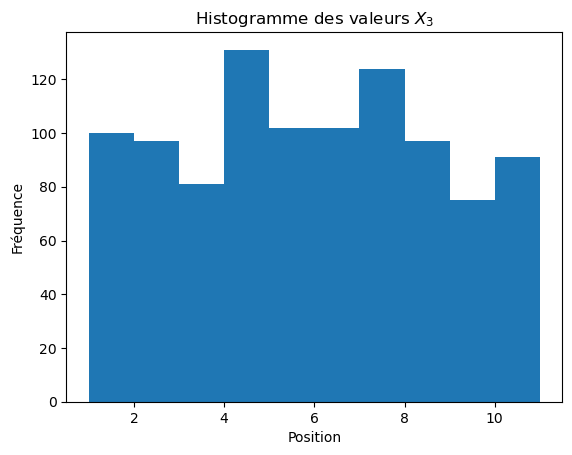

In [7]:
# Définition de la matrice de probabilité de transition
P4 = np.random.rand(10, 10)
P4 = P4 / np.sum(P4, axis=1, keepdims=True)

# Initialisation de la chaîne de Markov
M = 1000
N4 = 3
X4 = np.zeros((M, N4+1), dtype=int)
X4[:, 0] = 1

# Simulation de la chaîne de Markov
L = sim_dis(P4[0], range(1, 11), M) # Vu que X0 = 1 pour les M simulations
X4[:, 1] = L
for i in range(M):
    for j in range(1,N4):
        L = sim_dis(P4[X4[i][j]-1], range(1,11), 1)
        X4[i][j+1] = L[0]
    
# Tracé de l'histogramme des valeurs X3
plt.hist(X4[:, -1], bins=range(1, 12))
plt.title('Histogramme des valeurs $X_3$')
plt.xlabel('Position')
plt.ylabel('Fréquence')
plt.show()

### Question 5

► Pour estimer la probabilité $p_{10|3} = \mathbb{P}\left( X_3 = 10 \right)$, nous pouvons compter le nombre de trajectoires pour lesquelles $X_3$ est égal à 10 et diviser par le nombre total de trajectoires simulées. Nous pouvons utiliser le tableau $X$ généré dans la question précédente pour cela.

In [8]:
# Estimation de la probabilité P(X3 = 10)
M = 1000
count5 = 0

for i in range(M):
    if X4[i, -1] == 10:
        count5 += 1

prob5 = count5 / M
print("Estimation de la probabilité P(X3 = 10) =", prob5)

Estimation de la probabilité P(X3 = 10) = 0.091


► Pour calculer l'intervalle de confiance à 95%, on peut réutiliser la formule de la Q3 (M-échantillon de Bernoulli avec $T_1, ..., T_M$ tel que $\forall i (T_i = 1) = (X_3 = 10)$ et $ (T_i = 0) = (X_3 < 10)$ de paramètre $p_{10|3}$). :

$$ \boxed{ I = \left[\hat p_{10|3}-q_{0.975} \times \sqrt{\frac{\hat p_{10|3}(1-\hat p_{10|3})}{M}}, \  \hat p_{10|3}+q_{0.975} \times \sqrt{\frac{\hat p_{10|3}(1-\hat p_{10|3})}{M}}\right]}$$

avec $q_\alpha$ quantile d'ordre $\alpha$ de la loi normale centrée réduite et donc $q_{0.975} = 1.96$ d'après la table de la loi normale centrée réduite,     
$ M = 1000$ et $\hat p_{10|3}$  la probabilité estimée de la question précédente


In [9]:
# Calcul de l'intervalle de confiance à 95% de P(X3 = 10)
borne_inf5 = prob5 - 1.96*np.sqrt(prob5*(1-prob5)/1000)
borne_sup5 = prob5 + 1.96*np.sqrt(prob5*(1-prob5)/1000)
print("Intervalle de confiance à 95% de P(X3 = 10) = [", borne_inf5, ",", borne_sup5, "]")

Intervalle de confiance à 95% de P(X3 = 10) = [ 0.073173802693788 , 0.108826197306212 ]


► Pour calculer théoriquement $p_{10|3} = \mathbb{P}\left( X_3 = 10 \right)$, on va poser une suite de matrice $(U_n)_n$ défini par : $$U_0 = (\mathbb{P}\left( X_0 = 1 \right), \mathbb{P}\left( X_0 = 2 \right), \mathbb{P}\left( X_0 = 3 \right), \mathbb{P}\left( X_0 = 4 \right), \mathbb{P}\left( X_0 = 5 \right), \mathbb{P}\left( X_0 = 6 \right), \mathbb{P}\left( X_0 = 7 \right) ,\mathbb{P}\left( X_0 = 8 \right) ,\mathbb{P}\left( X_0 = 9 \right), \mathbb{P}\left( X_0 = 10 \right))$$

D'après la formule des probabilités totales :
$$\boxed{ \forall n \in \mathbb{N} : U_{n+1} = U_n \times P}$$
avec P la matrice de transition

Par récurrence simple sur n, on a $$ \boxed{\forall n \in \mathbb{N} : U_{n} = U_0 \times P^n}$$

Ainsi, $p_{10|3} = \mathbb{P}\left( X_3 = 10 \right)$ est le 10ème élément de $U_3$

In [10]:
# Calcul théorique de P(X3 = 10)

# on définit U0
U0 = np.array([1,0,0,0,0,0,0,0,0,0]) # car on a une condition initiale X0 = 1

# calcul de P^3
P4_puiss_3 = P4
for i in range(2):
    P4_puiss_3 = np.dot(P4_puiss_3,P4)

# calcul de U3 
U3 = np.dot(U0,P4_puiss_3)

# on récupère le 10e élément de U3
prob_theorique5 = U3[9]
print("Probabilité théorique P(X3 = 10) =", prob_theorique5)

# Vérification si la vraie valeur de la probabilité est dans l'intervalle de confiance
if prob_theorique5 <= borne_sup5 and prob_theorique5 >= borne_inf5:
    print("La vraie valeur de la probabilité P(X3 = 10) se trouve dans l’intervalle de confiance à 95%")
else: 
    print("La vraie valeur de la probabilité P(X3 = 10) ne se trouve pas dans l’intervalle de confiance à 95%")

Probabilité théorique P(X3 = 10) = 0.08065596149140483
La vraie valeur de la probabilité P(X3 = 10) se trouve dans l’intervalle de confiance à 95%


### Question 6

Question 4 avec $N$ = 100

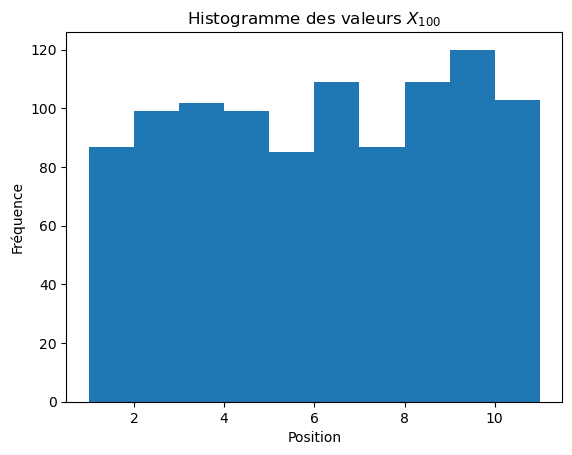

In [11]:
# Définition de la matrice de probabilité de transition
P6 = np.random.rand(10, 10)
P6 = P6 / np.sum(P6, axis=1, keepdims=True)

# Initialisation de la chaîne de Markov
M = 1000
N6 = 100
X6 = np.zeros((M, N6+1), dtype=int)
X6[:, 0] = 1

# Simulation de la chaîne de Markov
L = sim_dis(P6[0], range(1, 11), M) # Vu que X0 = 1 pour les M simulations
X6[:, 1] = L
for i in range(M):
    for j in range(1,N6):
        L = sim_dis(P6[X6[i][j]-1], range(1,11), 1)
        X6[i][j+1] = L[0]
    
# Tracé de l'histogramme des valeurs X3
plt.hist(X6[:, -1], bins=range(1, 12))
plt.title('Histogramme des valeurs $X_{100}$')
plt.xlabel('Position')
plt.ylabel('Fréquence')
plt.show()

Question 5 avec N = 100

In [12]:
# Calcul de la probabilité P(X100 = 10) pour N=100
M = 1000
N6 = 100
count6 = 0

for i in range(M):
    if X6[i, -1] == 10:
        count6 += 1

prob6 = count6 / M
print("Estimation de la probabilité P(X100 = 10) =", prob6)

Estimation de la probabilité P(X100 = 10) = 0.103


In [13]:
# Calcul de l'intervalle de confiance à 95% de P(X100 = 10) pour N=100
borne_inf6 = prob6 - 1.96*np.sqrt(prob6*(1-prob6)/1000)
borne_sup6 = prob6 + 1.96*np.sqrt(prob6*(1-prob6)/1000)
print("Intervalle de confiance à 95% de P(X100 = 10) = [", borne_inf6, ",", borne_sup6, "]")

Intervalle de confiance à 95% de P(X100 = 10) = [ 0.08416043350817222 , 0.12183956649182777 ]


In [14]:
# Calcul théorique de P(X100 = 10) pour N=100

# on définit U0
U0 = np.array([1,0,0,0,0,0,0,0,0,0]) # car on a une condition initiale X0 = 1

# calcul de P^100
P6_puiss_100 = P6
for i in range(99):
    P6_puiss_100 = np.dot(P6_puiss_100,P6)

# calcul de U100
U100 = np.dot(U0,P6_puiss_100)

# on récupère le 10e élément de U3
prob_theorique6 = U100[9]
print("Probabilité théorique P(X100 = 10) =", prob_theorique6)

# Vérification si la vraie valeur de la probabilité est dans l'intervalle de confiance
if prob_theorique6 <= borne_sup6 and prob_theorique6 >= borne_inf6:
    print("La vraie valeur de la probabilité P(X100 = 10) se trouve dans l’intervalle de confiance à 95%")
else: 
    print("La vraie valeur de la probabilité P(X100 = 10) ne se trouve pas dans l’intervalle de confiance à 95%")

Probabilité théorique P(X100 = 10) = 0.1153133719293303
La vraie valeur de la probabilité P(X100 = 10) se trouve dans l’intervalle de confiance à 95%


### Question 7

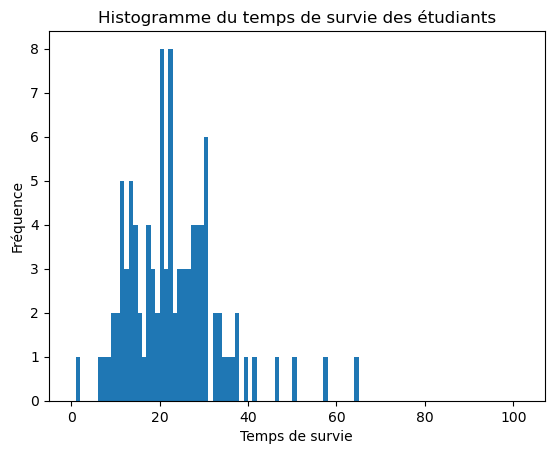

Temps de survie moyen : 22.7 tours


In [15]:
def death_time(N_e, N_s, P, Q, N):
    """
    Calcule le temps de survie de la population d'étudiants.
    """
    # liste de taille N_e avec False par défaut (True = mort)
    booleen = []
    for i in range(N_e):
        booleen.append(False)

    # Initialisation de la position des étudiants et du monstre
    X = np.ones(N_e, dtype=int)
    Y = N_s

    # Simulation de la chaîne de Markov
    # Vu que X0 = 1 pour les M simulations on peut appliquer directement le code suivant
    L = sim_dis(P[0], range(1, N_s+1), N_e)
    X = L
    for j in range(1,N):
        # déplacement monstre
        Y = sim_dis(Q[Y-1], range(1, N_s+1), 1)[0]

        # déplacement chaque joueur
        for i in range(N_e):
            L = sim_dis(P[X[i]-1], range(1, N_s+1), 1)
            X[i] = L[0]

            # monstre manger joueur si même case
            if Y == X[i]:
                booleen[i] = True

        # on regarde si tous les joueurs sont morts i.e. booleen est rempli de True
        if all(elem == True for elem in booleen):
            return j
        
    return N+1

# Définition des paramètres
N_e = 5
N_s = 10
N7 = 100
M7 = 100
P7 = np.random.rand(N_s, N_s)
P7 = P7 / np.sum(P7, axis=1, keepdims=True)
Q = np.array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]])

# Simulation de la chaîne de Markov pour M fois
T = np.zeros(M7)
for i in range(M7):
    T[i] = death_time(N_e, N_s, P7, Q, N7)

# Tracé de l'histogramme du temps de survie de la population d'étudiants
plt.hist(T, bins=range(0, N7+3))
plt.title('Histogramme du temps de survie des étudiants')
plt.xlabel('Temps de survie')
plt.ylabel('Fréquence')
plt.show()

# Calcul du temps de survie moyen des populations d'étudiants
T_mean = np.mean(T)
print('Temps de survie moyen :', T_mean, 'tours')